In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Preparation 

In [2]:
 #Read 4 datasets
General_sales_df = pd.read_csv("General Sales Data.csv")
Store_data_df = pd.read_csv("Store_Data.csv")
Departmet_data_df = pd.read_csv("Department_Data.csv")
Category_data_df = pd.read_csv("Category_Data.csv")

In [3]:
# the first few row of General_sales_df
General_sales_df.head() 

,Department ID,Category ID,Store ID,Sale Quantity,Gross Value for single Product (Single Sale),Retail Value (Single Sale),Tax with Revenue,Cost,Tax per unit,TotalQTY,TotalSales,SalesDate,Sales Time,Buying price per product
0,893,260,256,2,9.32,10.904000,0,0,1.58,2,18.632,3/16/2023 23:59,18:14:01,6.52
1,922,261,256,88,15.96,18.672727,0,0,2.71,88,1404.450,3/16/2023 23:59,11:03:45,12.93
2,9,7,256,10,8.03,9.395700,0,0,1.37,10,80.343,3/16/2023 23:59,19:22:52,6.35
3,9,8,256,3,6.81,7.968000,0,0,1.16,3,20.426,3/16/2023 23:59,8:26:30,5.17
4,9,10,256,3,13.88,16.237667,0,0,2.36,3,41.627,3/16/2023 23:59,10:35:50,10.69


In [4]:
# the first few row of Store_data_df
Store_data_df.head()

,Store ID,Store Name,Location
0,8,קייזר8,North East
1,9,קייזר9,Central
2,10,קייזר10,West
3,168,קייזר168,South
4,228,קייזר228,North East


In [5]:
# the first few row of Departmet_data_df
Departmet_data_df.head()

,Department ID,Department Name
0,9,עולם שימורים וחמוצים
1,859,מזון ומוצרים לחיות הבית
2,860,ירקות קפוא ח.ח
3,861,בשר בקר קפוא.ח.ח
4,862,עוף קפוא ח.ח


In [6]:
# the first few row of Category_data_df
Category_data_df.head()

,Category ID,Category Name
0,7,שימורי עגבניות
1,8,שימורי פירות
2,9,שימורי אירוח וקינוח
3,10,שימורי ירקות
4,11,זיתים


In [7]:
#Merge  Store_data_df with sales_data_merged using their respective IDs
sales_data = pd.merge(General_sales_df, Store_data_df, on='Store ID', how='left')

In [8]:
# the first few row of Merged Sales
sales_data.head()

,Department ID,Category ID,Store ID,Sale Quantity,Gross Value for single Product (Single Sale),Retail Value (Single Sale),Tax with Revenue,Cost,Tax per unit,TotalQTY,TotalSales,SalesDate,Sales Time,Buying price per product,Store Name,Location
0,893,260,256,2,9.32,10.904000,0,0,1.58,2,18.632,3/16/2023 23:59,18:14:01,6.52,קייזר256,southwest
1,922,261,256,88,15.96,18.672727,0,0,2.71,88,1404.450,3/16/2023 23:59,11:03:45,12.93,קייזר256,southwest
2,9,7,256,10,8.03,9.395700,0,0,1.37,10,80.343,3/16/2023 23:59,19:22:52,6.35,קייזר256,southwest
3,9,8,256,3,6.81,7.968000,0,0,1.16,3,20.426,3/16/2023 23:59,8:26:30,5.17,קייזר256,southwest
4,9,10,256,3,13.88,16.237667,0,0,2.36,3,41.627,3/16/2023 23:59,10:35:50,10.69,קייזר256,southwest


### Data Cleaning & Preprocessing: 

In [9]:
# summary of a DataFrame
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 372539 entries, 0 to 372538
Data columns (total 16 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   Department ID                                 372539 non-null  int64  
 1   Category ID                                   372539 non-null  int64  
 2   Store ID                                      372539 non-null  int64  
 3   Sale Quantity                                 372539 non-null  int64  
 4   Gross Value for single Product (Single Sale)  372539 non-null  float64
 5   Retail Value (Single Sale)                    372539 non-null  float64
 6   Tax with Revenue                              372539 non-null  int64  
 7   Cost                                          372539 non-null  int64  
 8   Tax per unit                                  372539 non-null  float64
 9   TotalQTY                                      37

#### Check The Null Values

In [10]:
# Check Null Coloums 
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print (sales_data.isnull().sum())

Department ID                                   0
Category ID                                     0
Store ID                                        0
Sale Quantity                                   0
Gross Value for single Product (Single Sale)    0
Retail Value (Single Sale)                      0
Tax with Revenue                                0
Cost                                            0
Tax per unit                                    0
TotalQTY                                        0
TotalSales                                      0
SalesDate                                       0
Sales Time                                      0
Buying price per product                        0
Store Name                                      0
Location                                        0
dtype: int64


#### Check The Duplications

In [11]:
#display all the rows that are duplicated in the sales_data DataFrame.
duplicate_rows = sales_data[sales_data.duplicated(keep=False)]
print(duplicate_rows)

Empty DataFrame
Columns: [Department ID, Category ID, Store ID, Sale Quantity, Gross Value for single Product (Single Sale), Retail Value (Single Sale), Tax with Revenue, Cost, Tax per unit, TotalQTY , TotalSales, SalesDate, Sales Time, Buying price per product, Store Name, Location]
Index: []


In [12]:
#provides descriptive statistics for numerical columns in a DataFrame
sales_data.describe()

,Department ID,Category ID,Store ID,Sale Quantity,Gross Value for single Product (Single Sale),Retail Value (Single Sale),Tax with Revenue,Cost,Tax per unit,TotalQTY,TotalSales,Buying price per product
count,372539.000000,372539.000000,372539.000000,372539.000000,372539.000000,372539.000000,372539.0,372539.0,372539.000000,372539.000000,372539.000000,372539.000000
mean,847.899925,192.334424,243.795117,31.291658,14.644503,16.951390,0.0,0.0,2.307140,31.277241,289.375671,11.081090
std,195.542087,104.581326,59.998385,87.845791,14.911198,16.968843,0.0,0.0,2.350968,87.850843,727.944891,11.161569
min,9.000000,7.000000,8.000000,-248.000000,0.000000,-0.000100,0.0,0.0,-5.210000,-248.000000,-5940.230000,0.000000
25%,870.000000,116.000000,241.000000,2.000000,7.860000,9.150000,0.0,0.0,1.220000,2.000000,31.210000,5.995000
50%,887.000000,177.000000,256.000000,7.000000,11.530000,13.371333,0.0,0.0,1.870000,7.000000,87.090000,8.670000
75%,910.000000,277.000000,272.000000,23.000000,16.730000,19.405000,0.0,0.0,2.750000,23.000000,253.843000,12.510000
max,939.000000,1225.000000,292.000000,4106.000000,585.110000,684.557000,0.0,0.0,99.450000,4106.000000,33435.989000,403.750000


In [13]:
#display Unique Values in dataframe
for col in sales_data.columns:
    print('{} : {}'.format(col,sales_data[col].unique()))

Department ID : [893 922   9 867 891 897 907 884 895 887 918 864 931 863 932 866 868 869
 894 873 888 910 861 935 865 883 860 870 939 892 899 881 904 905 906 859
 911 916 882 874 919 921 930 880 936 886 889 901 902 908 912 885 923 927
 879 917 875 903 898 862 872]
Category ID : [ 260  261    7    8   10  266   11   12   13  269   14  270  271  275
  277  282  284  286  301  302  303   50  306   51  308   53   54  311
   56   57   58  314  315  316  317  318   63  320  321  322  324  325
  326   75  331  332   77  333  334   79  335   82  339   85   92  349
   96   97   98   99  355  102  107  108  109  111  112  115  116  121
  122  128  132  133  134  135  136  137  138  139  142  145  146  149
  150  152  153  154  155  156  157  159  166  168  170  171  175  180
  181  184  187  190  197  198 1222  204  207  213  218  222  223  228
  231  233  234  238  243  244  245  249  256  264    9  265  268  273
  278  279  280  281  288  289  290  291  292  298   46  305   52  309
  310  313 

#### Drop columns that aren’t useful

In [14]:
# Drop columns that aren’t useful
sales_data.drop(['Department ID','Category ID','Store ID','Store Name','Tax with Revenue','Cost'], axis=1, inplace=True)
display(sales_data)

,Sale Quantity,Gross Value for single Product (Single Sale),Retail Value (Single Sale),Tax per unit,TotalQTY,TotalSales,SalesDate,Sales Time,Buying price per product,Location
0,2,9.32,10.904000,1.58,2,18.632,3/16/2023 23:59,18:14:01,6.52,southwest
1,88,15.96,18.672727,2.71,88,1404.450,3/16/2023 23:59,11:03:45,12.93,southwest
2,10,8.03,9.395700,1.37,10,80.343,3/16/2023 23:59,19:22:52,6.35,southwest
3,3,6.81,7.968000,1.16,3,20.426,3/16/2023 23:59,8:26:30,5.17,southwest
4,3,13.88,16.237667,2.36,3,41.627,3/16/2023 23:59,10:35:50,10.69,southwest
...,...,...,...,...,...,...,...,...,...,...
372534,12,5.62,6.576333,0.96,12,67.422,3/14/2023 23:59,10:16:33,4.38,North
372535,114,2.43,2.843614,0.41,114,277.246,3/14/2023 23:59,19:25:10,1.97,North
372536,6,10.81,12.648333,1.84,6,64.870,3/14/2023 23:59,20:49:40,8.11,North
372537,5,8.46,9.898000,1.44,5,42.310,3/14/2023 23:59,21:57:32,5.75,North


In [15]:
#correlation matrix
sales_data.corr()
 


,Sale Quantity,Gross Value for single Product (Single Sale),Retail Value (Single Sale),Tax per unit,TotalQTY,TotalSales,Buying price per product
Sale Quantity,1.000000,-0.128919,-0.130002,-0.120685,0.999999,0.874212,-0.130417
Gross Value for single Product (Single Sale),-0.128919,1.000000,0.997446,0.856827,-0.129138,-0.002340,0.995331
Retail Value (Single Sale),-0.130002,0.997446,1.000000,0.891468,-0.130171,-0.000961,0.990803
Tax per unit,-0.120685,0.856827,0.891468,1.000000,-0.120517,0.007873,0.838491
TotalQTY,0.999999,-0.129138,-0.130171,-0.120517,1.000000,0.874219,-0.130643
TotalSales,0.874212,-0.002340,-0.000961,0.007873,0.874219,1.000000,-0.003219
Buying price per product,-0.130417,0.995331,0.990803,0.838491,-0.130643,-0.003219,1.000000


## Exploratory Data Analysis and Visualization:

<AxesSubplot:>

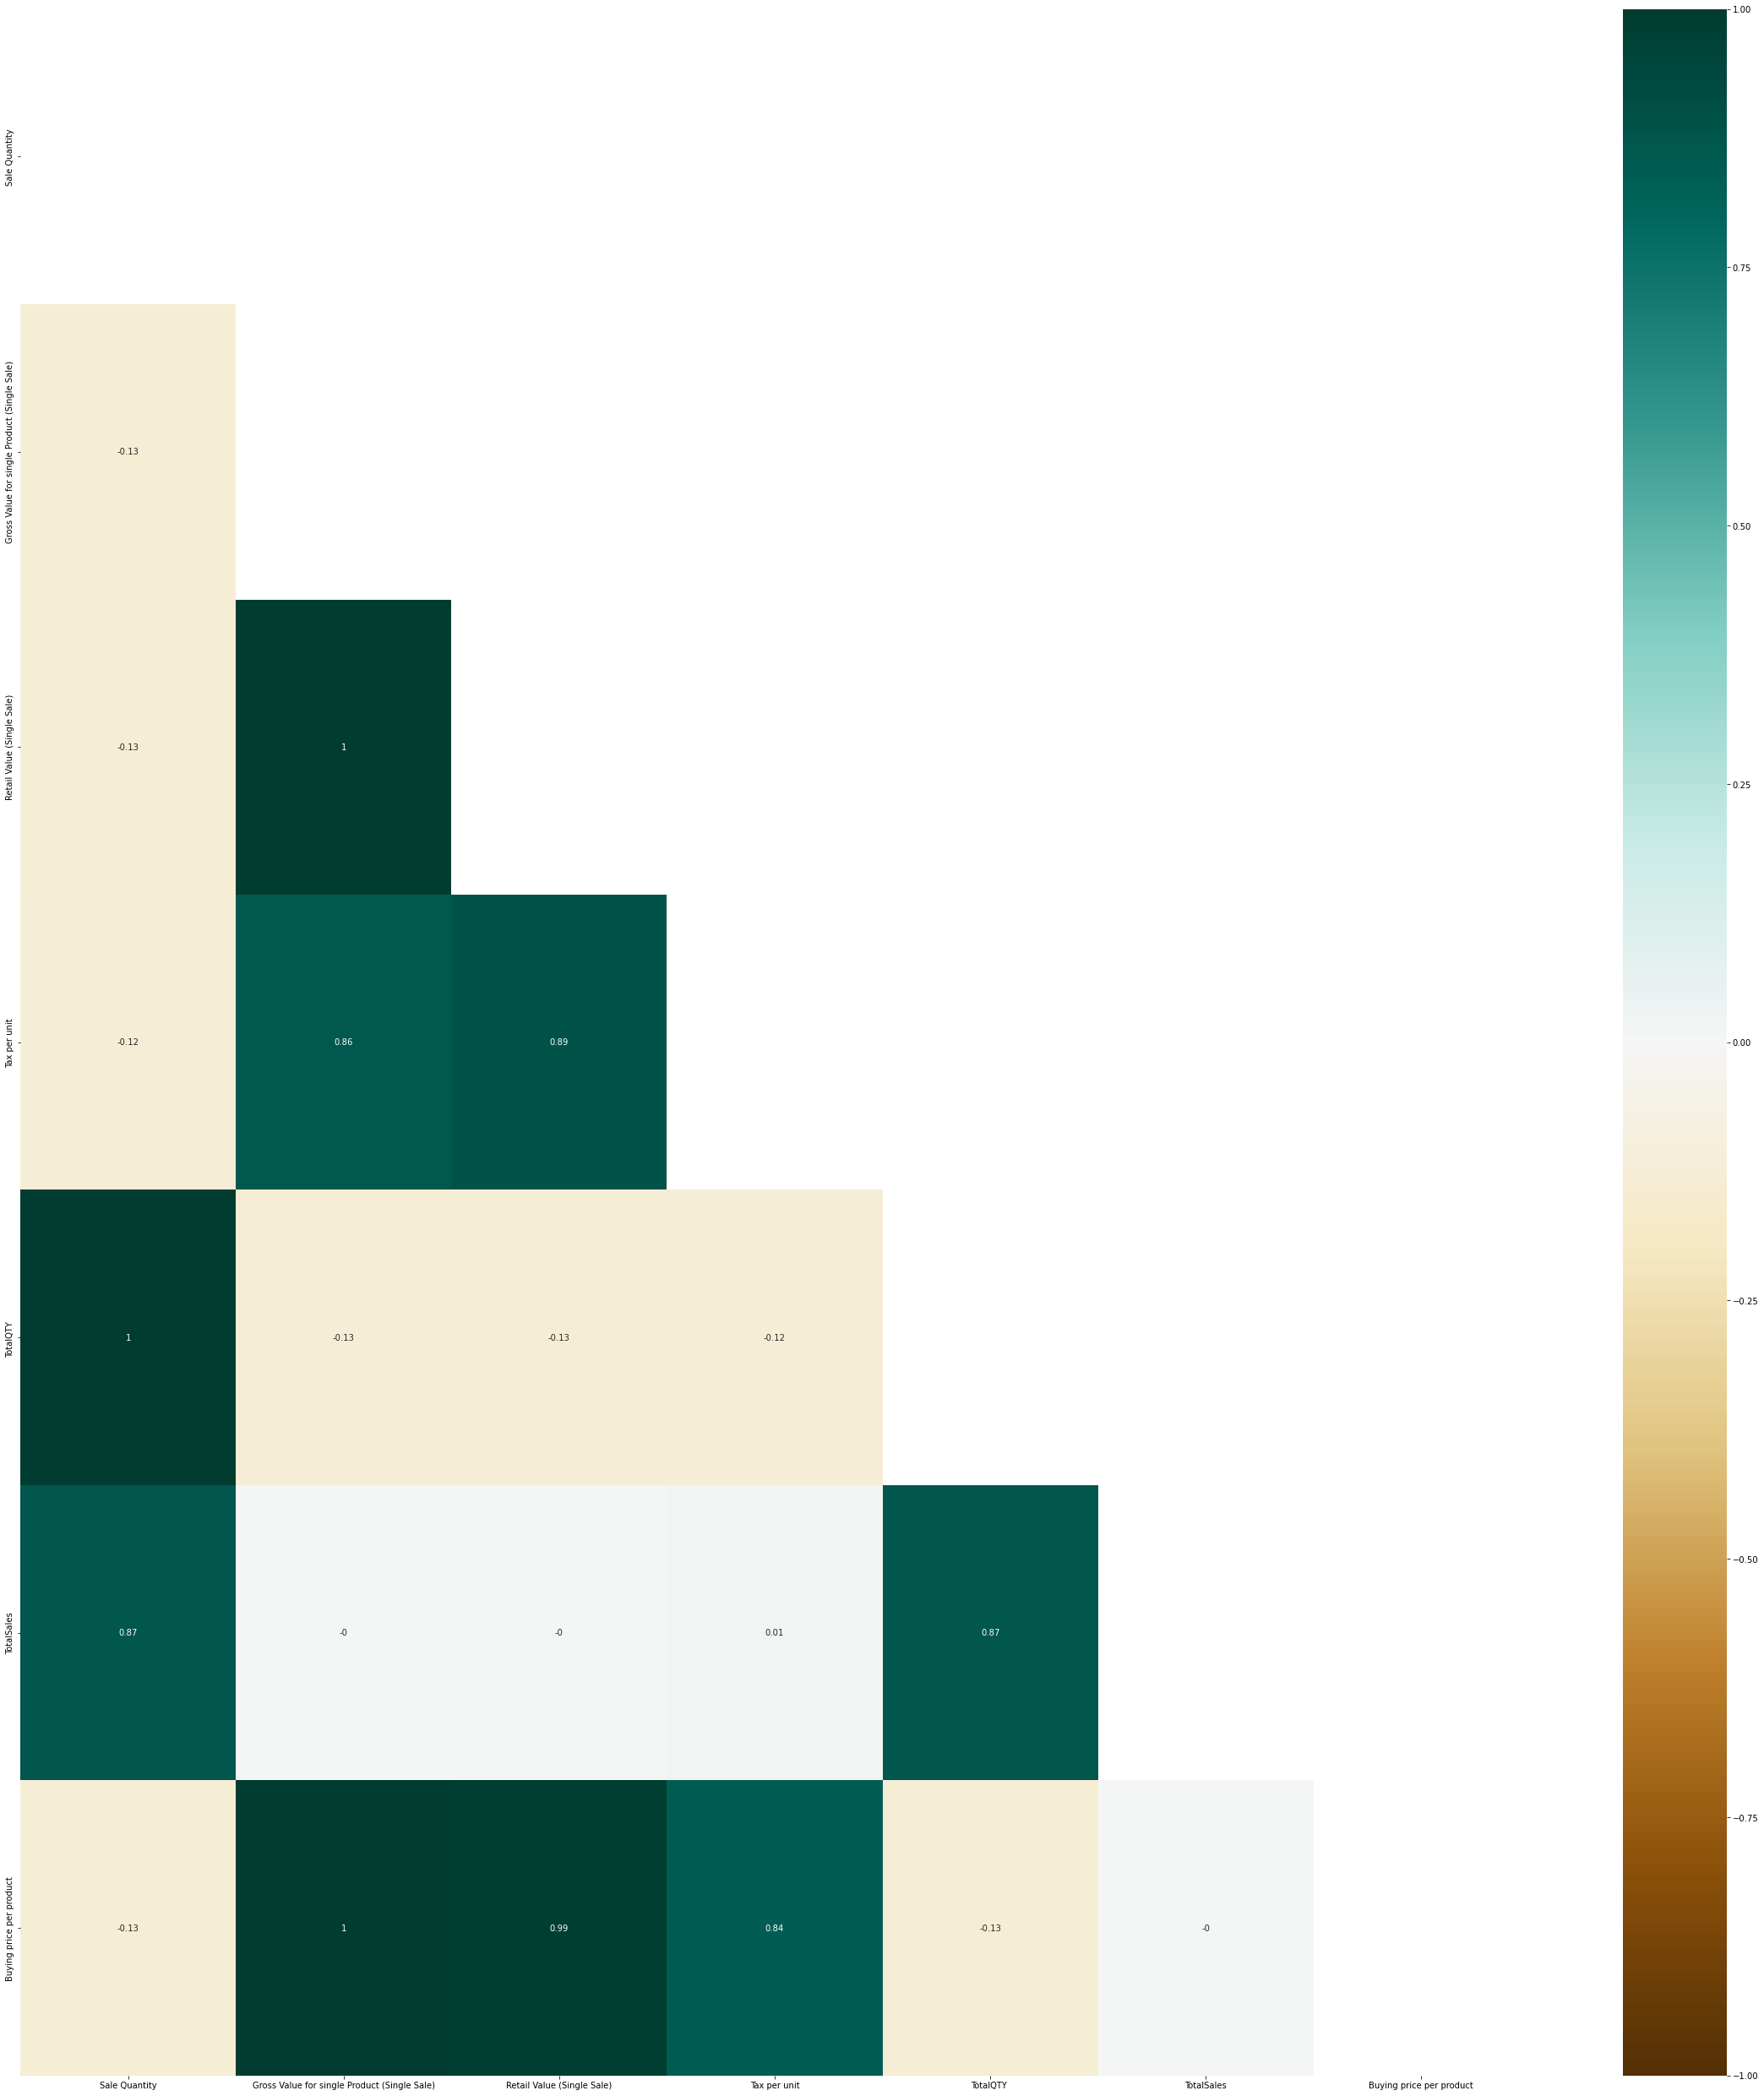

In [16]:
# a heatmap visualization of the correlation matrix
plt.figure(figsize=(40,45))
matrix = sales_data.corr().round(2)
mask = np.triu(np.ones_like(matrix, dtype= bool))
sns.heatmap(matrix, annot=True, vmin=-1, vmax=1, mask=mask, cmap='BrBG')

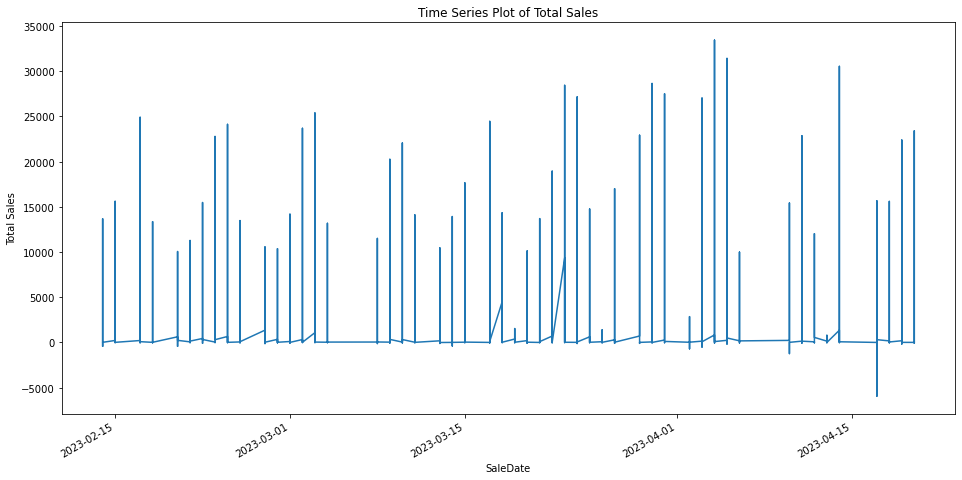

In [17]:
#Visualize the Time Series Plot of Total Sales

sales_data['SalesDate'] = pd.to_datetime(sales_data['SalesDate'])  # Convert to datetime if not already
sales_data.set_index('SalesDate', inplace=True)
 
plt.figure(figsize=(16, 8))
sales_data['TotalSales'].plot()
plt.title('Time Series Plot of Total Sales')
plt.xlabel('SaleDate')
plt.ylabel('Total Sales')
plt.show()

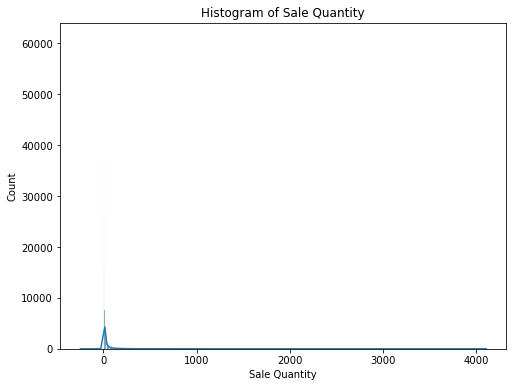

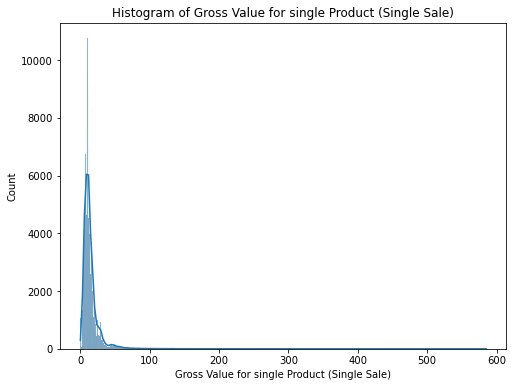

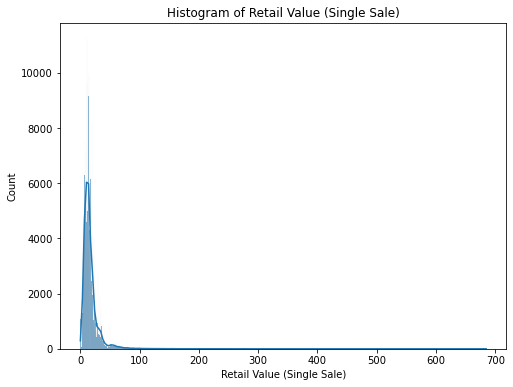

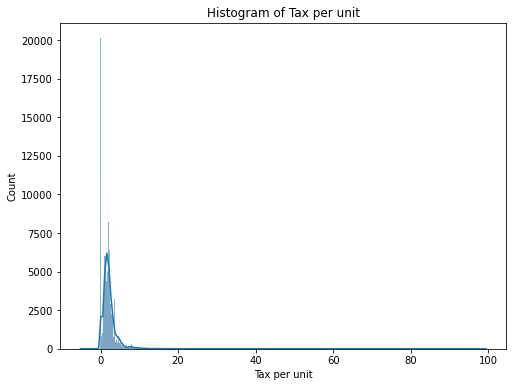

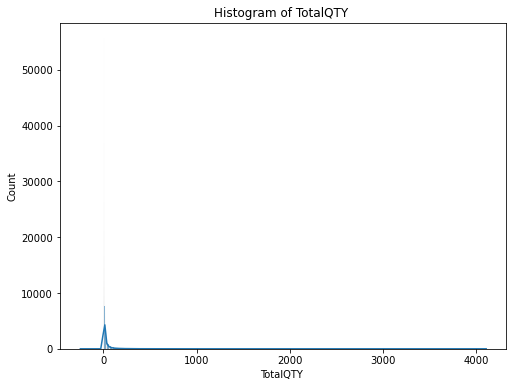

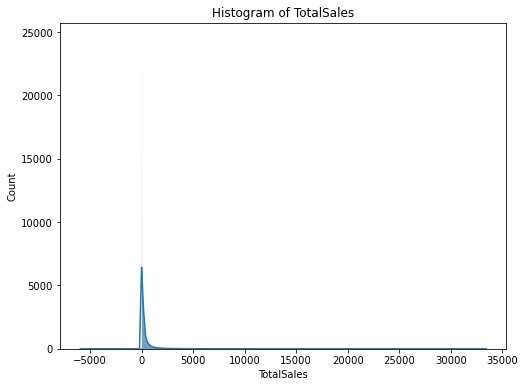

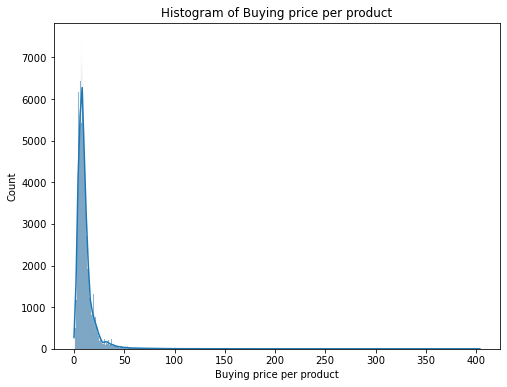

In [18]:
# Visualize histograms for numerical columns within a DataFrame

import matplotlib.pyplot as plt
import seaborn as sns
 
# Assuming df is your DataFrame
num_cols = sales_data.select_dtypes(include=['int64', 'float64']).columns
 
for col in num_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(sales_data[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.show()

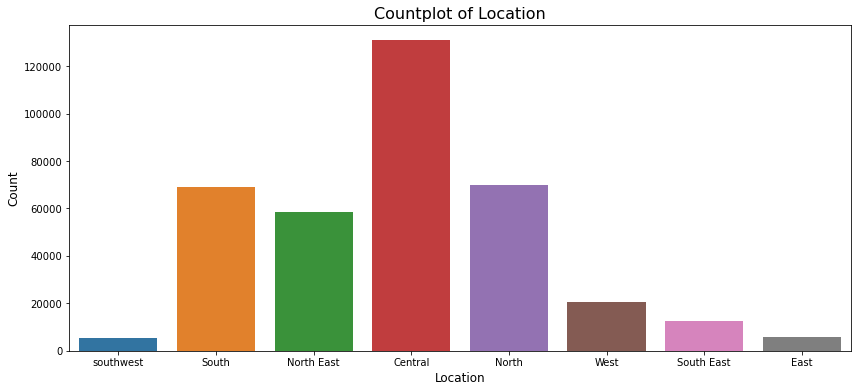

In [19]:
#Visualize the distribution of categorical variables

cat_col = 'Location'  # Replace with your categorical column
 
# Increase the width of the plot

plt.figure(figsize=(14, 6))
 
# Use seaborn countplot

sns.countplot(x=sales_data[cat_col])
 
# Adding title and labels

plt.title(f'Countplot of {cat_col}', fontsize=16)

plt.xlabel(cat_col, fontsize=12)

plt.ylabel('Count', fontsize=12)
 
# Show the plot

plt.show()


### Data Transformation

In [21]:
#Apply one hot encoding for Loction 
sales_data = pd.get_dummies(sales_data, columns = ['Location'], dtype=int)
sales_data

,Sale Quantity,Gross Value for single Product (Single Sale),Retail Value (Single Sale),Tax per unit,TotalQTY,TotalSales,Sales Time,Buying price per product,Location_Central,Location_East,Location_North,Location_North East,Location_South,Location_South East,Location_West,Location_southwest
SalesDate,,,,,,,,,,,,,,,,
2023-03-16 23:59:00,2,9.32,10.904000,1.58,2,18.632,18:14:01,6.52,0,0,0,0,0,0,0,1
2023-03-16 23:59:00,88,15.96,18.672727,2.71,88,1404.450,11:03:45,12.93,0,0,0,0,0,0,0,1
2023-03-16 23:59:00,10,8.03,9.395700,1.37,10,80.343,19:22:52,6.35,0,0,0,0,0,0,0,1
2023-03-16 23:59:00,3,6.81,7.968000,1.16,3,20.426,8:26:30,5.17,0,0,0,0,0,0,0,1
2023-03-16 23:59:00,3,13.88,16.237667,2.36,3,41.627,10:35:50,10.69,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-14 23:59:00,12,5.62,6.576333,0.96,12,67.422,10:16:33,4.38,0,0,1,0,0,0,0,0
2023-03-14 23:59:00,114,2.43,2.843614,0.41,114,277.246,19:25:10,1.97,0,0,1,0,0,0,0,0
2023-03-14 23:59:00,6,10.81,12.648333,1.84,6,64.870,20:49:40,8.11,0,0,1,0,0,0,0,0


In [22]:
# Resetting the index, which moves 'SalesDate' back to a column
sales_data.reset_index(inplace=True)
 
# Display the DataFrame to verify the changes
sales_data.head()

,SalesDate,Sale Quantity,Gross Value for single Product (Single Sale),Retail Value (Single Sale),Tax per unit,TotalQTY,TotalSales,Sales Time,Buying price per product,Location_Central,Location_East,Location_North,Location_North East,Location_South,Location_South East,Location_West,Location_southwest
0,2023-03-16 23:59:00,2,9.32,10.904000,1.58,2,18.632,18:14:01,6.52,0,0,0,0,0,0,0,1
1,2023-03-16 23:59:00,88,15.96,18.672727,2.71,88,1404.450,11:03:45,12.93,0,0,0,0,0,0,0,1
2,2023-03-16 23:59:00,10,8.03,9.395700,1.37,10,80.343,19:22:52,6.35,0,0,0,0,0,0,0,1
3,2023-03-16 23:59:00,3,6.81,7.968000,1.16,3,20.426,8:26:30,5.17,0,0,0,0,0,0,0,1
4,2023-03-16 23:59:00,3,13.88,16.237667,2.36,3,41.627,10:35:50,10.69,0,0,0,0,0,0,0,1


In [23]:
#Drop Some Numberical Coulums 
sales_data.drop(['Sales Time','SalesDate'], axis=1, inplace=True)

In [24]:
sales_data.head()

,Sale Quantity,Gross Value for single Product (Single Sale),Retail Value (Single Sale),Tax per unit,TotalQTY,TotalSales,Buying price per product,Location_Central,Location_East,Location_North,Location_North East,Location_South,Location_South East,Location_West,Location_southwest
0,2,9.32,10.904000,1.58,2,18.632,6.52,0,0,0,0,0,0,0,1
1,88,15.96,18.672727,2.71,88,1404.450,12.93,0,0,0,0,0,0,0,1
2,10,8.03,9.395700,1.37,10,80.343,6.35,0,0,0,0,0,0,0,1
3,3,6.81,7.968000,1.16,3,20.426,5.17,0,0,0,0,0,0,0,1
4,3,13.88,16.237667,2.36,3,41.627,10.69,0,0,0,0,0,0,0,1


### Outline Handling 

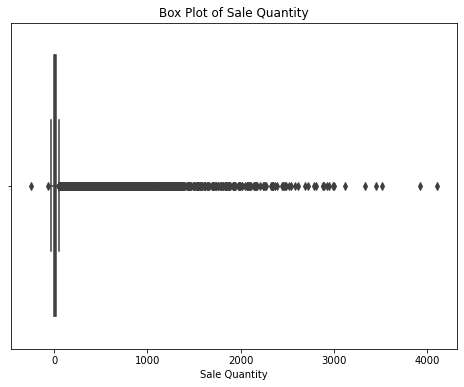

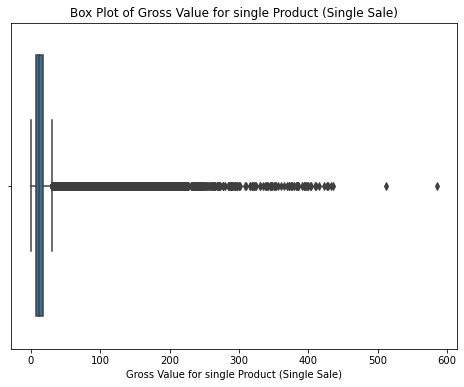

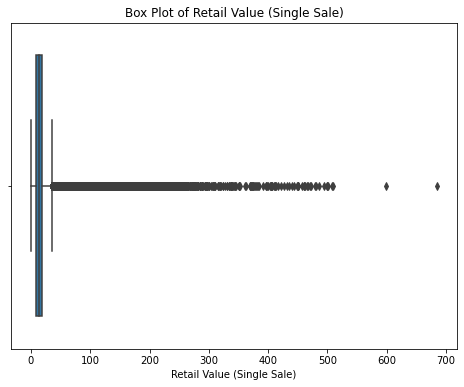

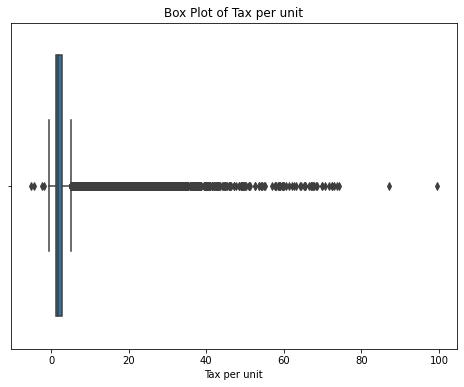

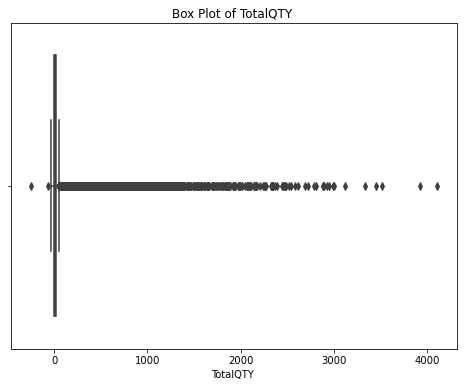

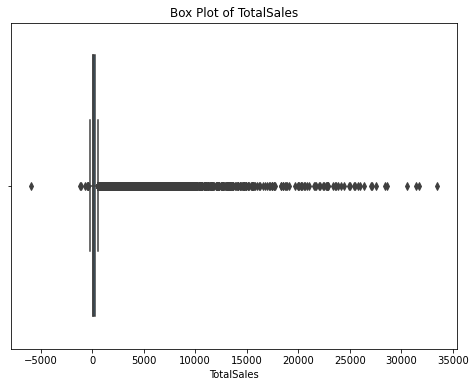

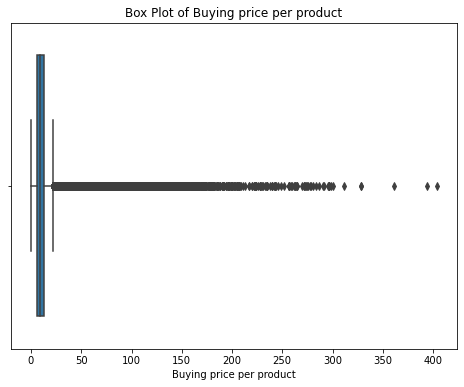

In [26]:
#Use box plots to identify outliers and understand the distribution. - Before Handling outliers
for col in num_cols:

    plt.figure(figsize=(8, 6))

    sns.boxplot(x=sales_data[col])

    plt.title(f'Box Plot of {col}')

    plt.show()

In [27]:
# Create a list of numerical values
outlier_vars = ['Sale Quantity', 'Gross Value for single Product (Single Sale)', 'Retail Value (Single Sale)', 'Tax per unit', 'TotalQTY ', 'Buying price per product', 'Location_Central', 'Location_East', 'Location_North', 'Location_North East', 'Location_South', 'Location_South East', 'Location_West', 'Location_southwest']
 
# Print 
print("Column Names:", outlier_vars)

Column Names: ['Sale Quantity', 'Gross Value for single Product (Single Sale)', 'Retail Value (Single Sale)', 'Tax per unit', 'TotalQTY ', 'Buying price per product', 'Location_Central', 'Location_East', 'Location_North', 'Location_North East', 'Location_South', 'Location_South East', 'Location_West', 'Location_southwest']


In [28]:
import pandas as pd
import numpy as np
 
# Exclude string columns from outlier detection and clipping
numeric_vars = [col for col in outlier_vars if sales_data[col].dtype != object]
 
# Define upper and lower bounds for each numeric column
upper_bounds = sales_data[numeric_vars].quantile(0.99)
lower_bounds = sales_data[numeric_vars].quantile(0.01)
 
# Replace outliers with upper and lower bounds
sales_data[numeric_vars] = sales_data[numeric_vars].clip(lower=lower_bounds, upper=upper_bounds, axis=1)


C:\Users\Chamodhi\AppData\Local\Temp\ipykernel_29776\652885644.py:12: FutureWarning: Downcasting integer-dtype results in .where is deprecated and will change in a future version. To retain the old behavior, explicitly cast the results to the desired dtype.
  sales_data[numeric_vars] = sales_data[numeric_vars].clip(lower=lower_bounds, upper=upper_bounds, axis=1)


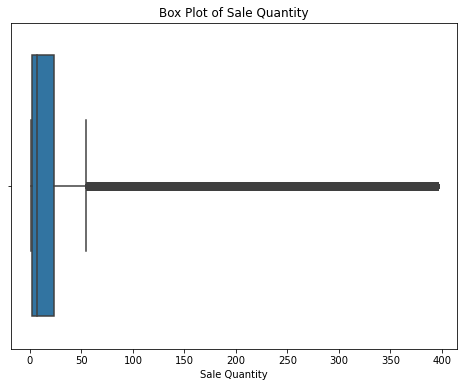

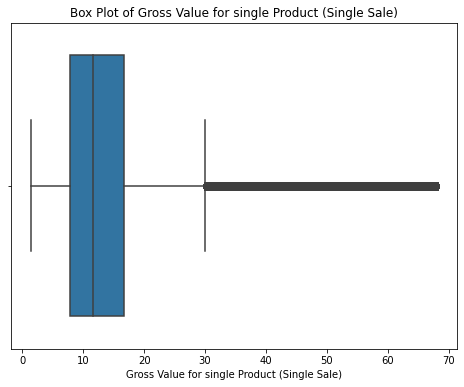

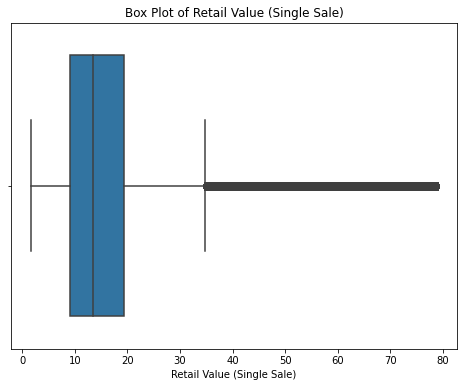

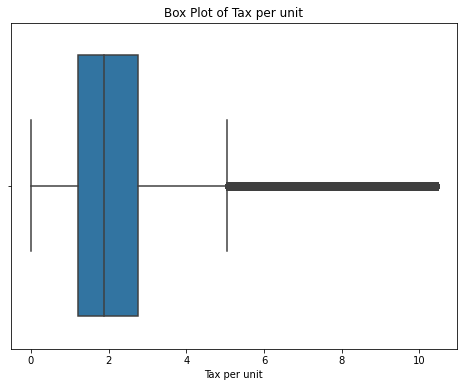

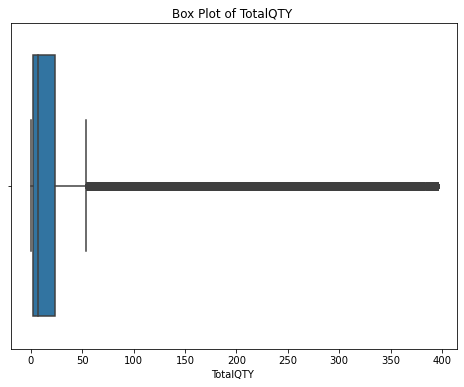

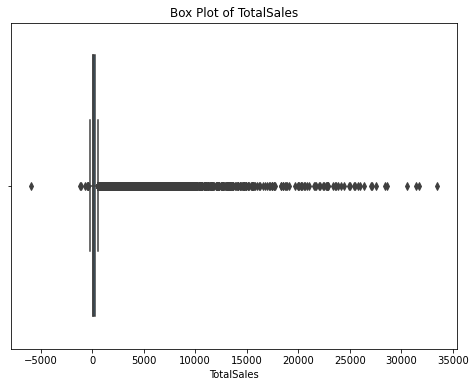

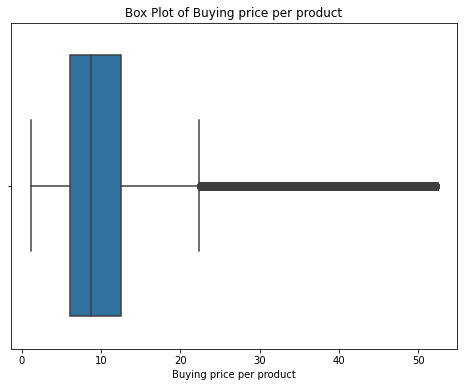

In [30]:
#Use box plots to identify outliers and understan\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\d the distribution. -  After handling outliers
for col in num_cols:

    plt.figure(figsize=(8, 6))

    sns.boxplot(x=sales_data[col])

    plt.title(f'Box Plot of {col}')

    plt.show()

# Data Normalization

In [32]:
#Normalize MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
 
# # Selecting only the numeric columns
# numeric_columns = sales_data.select_dtypes(include=['float64', 'int64']).columns
 
# Scaling the numeric columns using MinMaxScaler
scaler = MinMaxScaler()
sales_data[outlier_vars] = scaler.fit_transform(sales_data[outlier_vars])

In [33]:
sales_data

,Sale Quantity,Gross Value for single Product (Single Sale),Retail Value (Single Sale),Tax per unit,TotalQTY,TotalSales,Buying price per product,Location_Central,Location_East,Location_North,Location_North East,Location_South,Location_South East,Location_West,Location_southwest
0,0.002538,0.118715,0.119885,0.151251,0.005063,18.632,0.105199,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.220812,0.218370,0.220521,0.259424,0.222785,1404.450,0.230306,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.022843,0.099355,0.100347,0.131148,0.025316,80.343,0.101881,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.005076,0.081045,0.081853,0.111045,0.007595,20.426,0.078851,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.005076,0.187153,0.188977,0.225919,0.007595,41.627,0.186587,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372534,0.027919,0.063185,0.063825,0.091899,0.030380,67.422,0.063432,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
372535,0.286802,0.015308,0.015472,0.039249,0.288608,277.246,0.016395,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
372536,0.012690,0.141078,0.142481,0.176141,0.015190,64.870,0.136232,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
372537,0.010152,0.105808,0.106854,0.137849,0.012658,42.310,0.090171,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


# Model Buiding


### Linear Regression

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
 
#Split the data into features(X) and labels(y)

X = sales_data.drop(['TotalSales'], axis=1)
y = sales_data[['TotalSales']]
 
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
 
# Initialize and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
 
# Make predictions on the test set
y_pred = lr_model.predict(X_test)
 
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

from sklearn.metrics import mean_absolute_error, r2_score
 
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')
 
# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

Mean Squared Error: 206303.12283917508
Mean Absolute Error: 140.90148162479198
R-squared: 0.6261305535332905


In [47]:
# DataFrame to store actual and predicted values
result_df = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted': y_pred.flatten()})
print(result_df)

         Actual  Predicted
0       25.4700      13.75
1      341.8830     259.25
2       36.5390      89.00
3       29.4770      25.50
4      247.8901     269.75
...         ...        ...
74503    0.0000    -116.00
74504   50.8500       0.00
74505  453.2300     684.00
74506   12.4800      -8.50
74507   21.7060      -5.50

[74508 rows x 2 columns]


### Decision Tree Regression Model

In [41]:
from sklearn.tree import DecisionTreeRegressor
 
# Assuming X is your feature matrix and y is 'TotalSales'
# (Same X and y as used for Linear Regression)
 
# Initialize and train the Decision Tree model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
 
# Make predictions on the test set
y_pred_dt = dt_model.predict(X_test)
 
# Evaluate the model
mse_dt = mean_squared_error(y_test, y_pred_dt)
print(f'Mean Squared Error (Decision Tree): {mse_dt}')

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred_dt)
print(f'Mean Absolute Error: {mae}')
 
# Calculate R-squared
r2 = r2_score(y_test, y_pred_dt)
print(f'R-squared: {r2}')

Mean Squared Error (Decision Tree): 125630.45168465155
Mean Absolute Error: 21.966692615340623
R-squared: 0.7723282770308879


In [48]:
# DataFrame to store actual and predicted values
result_df = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted': y_pred_dt.flatten()})
print(result_df)

         Actual   Predicted
0       25.4700   25.470000
1      341.8830  341.480000
2       36.5390   36.320000
3       29.4770   29.477000
4      247.8901  247.953000
...         ...         ...
74503    0.0000   -0.001311
74504   50.8500   50.850000
74505  453.2300  453.490000
74506   12.4800   12.480000
74507   21.7060   21.706000

[74508 rows x 2 columns]


### Gradient Boosting Regression Model

In [43]:
from sklearn.ensemble import GradientBoostingRegressor
 
# Initialize and train the Gradient Boosting model
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train.values.ravel())
 
# Make predictions on the test set
y_pred_gb = gb_model.predict(X_test)
 
# Evaluate the model
mse_gb = mean_squared_error(y_test, y_pred_gb)
print(f'Mean Squared Error (Gradient Boosting): {mse_gb}')

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred_gb)
print(f'Mean Absolute Error: {mae}')
 
# Calculate R-squared
r2 = r2_score(y_test, y_pred_gb)
print(f'R-squared: {r2}')

Mean Squared Error (Gradient Boosting): 70293.21241163924
Mean Absolute Error: 30.527523997004064
R-squared: 0.8726122801582916


In [49]:
# DataFrame to store actual and predicted values
result_df = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted':  y_pred_gb.flatten()})
print(result_df)

         Actual   Predicted
0       25.4700   25.530800
1      341.8830  322.809342
2       36.5390    2.152833
3       29.4770   23.749072
4      247.8901  271.688665
...         ...         ...
74503    0.0000  -22.524816
74504   50.8500   49.464962
74505  453.2300  433.385859
74506   12.4800   13.527827
74507   21.7060   23.328331

[74508 rows x 2 columns]


### Random Forest Regression Model

In [45]:
from sklearn.ensemble import RandomForestRegressor
 
# Assuming X is your feature matrix and y is 'TotalSales'
# (Same X and y as used for Linear Regression)
 
# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
 
# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)
 
# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f'Mean Squared Error (Random Forest): {mse_rf}')

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred_rf)
print(f'Mean Absolute Error: {mae}')
 
# Calculate R-squared
r2 = r2_score(y_test, y_pred_rf)
print(f'R-squared: {r2}')

C:\Users\Chamodhi\AppData\Local\Temp\ipykernel_29776\189515546.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)


Mean Squared Error (Random Forest): 87109.48397711253
Mean Absolute Error: 17.548895516858366
R-squared: 0.8421372681696533


In [50]:
# DataFrame to store actual and predicted values
result_df = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted':  y_pred_rf.flatten()})
print(result_df)

         Actual   Predicted
0       25.4700   25.470000
1      341.8830  341.615480
2       36.5390   36.240208
3       29.4770   29.477000
4      247.8901  247.835830
...         ...         ...
74503    0.0000    0.000927
74504   50.8500   50.850000
74505  453.2300  453.912380
74506   12.4800   12.480000
74507   21.7060   21.706000

[74508 rows x 2 columns]


NameError: name 'df' is not defined